In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.cluster import DBSCAN
from plotnine import *
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv(r"D:\ml2\project\test.csv",index_col="ID")

In [3]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,,,,,,,,,,,,,,,,
10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


In [4]:
data=df.copy()

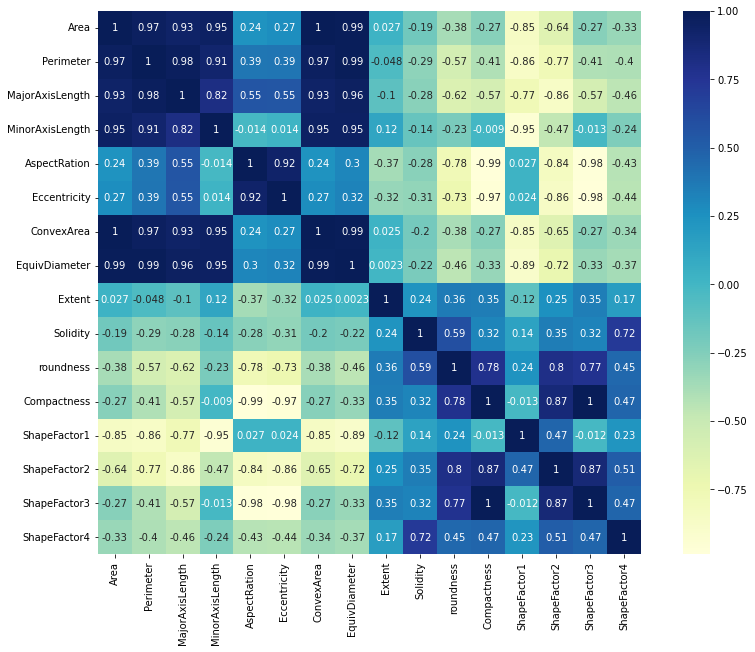

In [5]:
# Apply correlation plot to see the correlation between numerical variables.

plt.figure(figsize=(15,10))
# plt.figure(figsize=(14, 14))
dat_cor = data.corr()
sns.heatmap(dat_cor, cmap = 'YlGnBu', annot=True, square=True);

In [6]:
#sc=StandardScaler()
sc=RobustScaler()

In [7]:
data_sc = sc.fit_transform(data)

In [8]:
data_sc

array([[ 0.5204458 ,  0.5758766 ,  0.71874773, ..., -0.68559871,
        -1.33074154, -8.25166584],
       [-0.61317793, -0.59019639, -0.54259915, ...,  0.63993855,
         0.42370892,  0.38667171],
       [ 0.40342202,  0.41656533,  0.08791205, ...,  0.14945439,
         0.74355926, -0.19192141],
       ...,
       [ 0.66042697,  0.7657932 ,  0.88240441, ..., -0.77133498,
        -1.50667182, -9.51829562],
       [-0.39867357, -0.34453233, -0.33602064, ...,  0.33148818,
         0.19617151,  0.21609016],
       [ 0.18750491,  0.12089678,  0.09991177, ..., -0.05365274,
         0.05849931,  0.17495645]])

# Applying PCA

In [61]:
pca = PCA()
# pca.fit(data_sc)
# # x = np.cumsum(pca.explained_variance_ratio_)
# # x
# pca.explained_variance_ratio_

In [62]:
# best_num = np.argmax(x >= 0.90) + 1
# best_num

In [63]:
model3 = PCA(n_components=10)

In [64]:
data_pca=model3.fit_transform(data_sc)

In [65]:
data_pca

array([[ 4.95892858e+00, -5.69547667e+00,  7.93863472e+00, ...,
        -3.95958664e-01,  6.08108171e-02, -1.34052373e-02],
       [-2.70972333e+00, -3.29788200e-01,  8.43616048e-02, ...,
         8.30838831e-02, -4.77376355e-02, -2.00473035e-02],
       [ 3.31110193e-01,  9.74906551e-01,  2.00028188e+00, ...,
        -2.55704734e-02,  3.97857658e-02,  1.83391766e-02],
       ...,
       [ 5.76872124e+00, -6.21403941e+00,  8.38825454e+00, ...,
         7.91049747e-03,  2.79371668e-02, -3.46418607e-02],
       [-1.72939788e+00, -6.27278035e-01,  2.28962069e-01, ...,
         5.98178485e-02, -1.85452121e-02,  2.52604219e-02],
       [-4.69899326e-01,  4.69481209e-01, -7.06719567e-01, ...,
        -3.73918487e-02,  1.26714868e-02,  2.00305048e-02]])

In [68]:
cols=[]
for i in np.arange(10):
    cols.append('PCA' + str(i+1))

In [69]:
data=pd.DataFrame(data_pca,columns=(cols))

In [70]:
data.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,4.958929,-5.695477,7.938635,-0.643323,-1.912896,0.134484,0.045678,-0.395959,0.060811,-0.013405
1,-2.709723,-0.329788,0.084362,-0.054984,0.293229,0.500022,0.023994,0.083084,-0.047738,-0.020047
2,0.331110,0.974907,2.000282,1.007218,1.090350,-0.168163,-0.167815,-0.025570,0.039786,0.018339
3,-3.260701,-0.702580,-0.071148,0.417731,-0.253889,0.869697,0.014042,0.006847,-0.040087,-0.080300
4,6.338977,4.010901,-0.165185,-0.599257,-0.070988,0.384487,0.008635,0.112857,0.136471,-0.076418


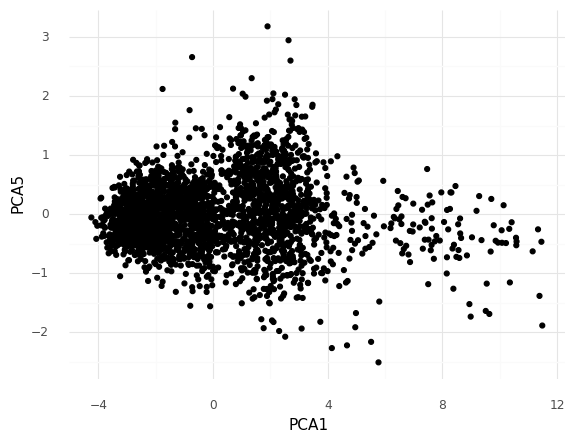

<ggplot: (156278911245)>

In [71]:
ggplot(data, aes(x = 'PCA1', y = 'PCA5')) + geom_point() + theme_minimal()

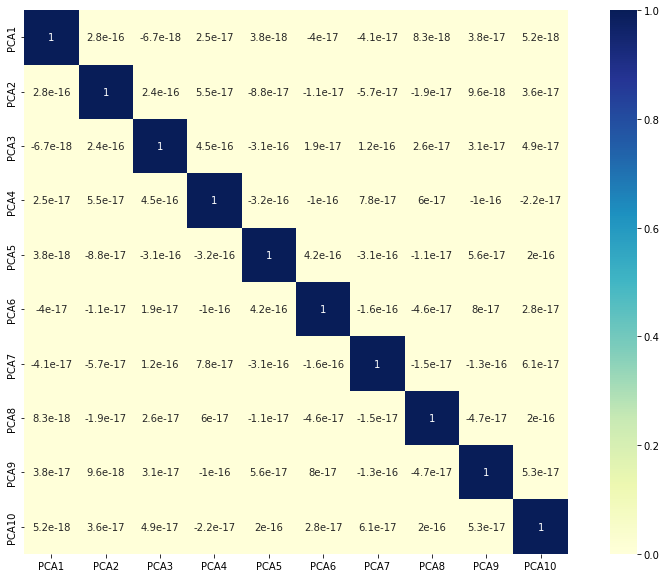

In [72]:
# Apply correlation plot to see the correlation between numerical variables.

plt.figure(figsize=(15,10))
# plt.figure(figsize=(14, 14))
dat_cor = data.corr()
sns.heatmap(dat_cor, cmap = 'YlGnBu', annot=True, square=True);

# KMeans

In [22]:
data1=data.copy()

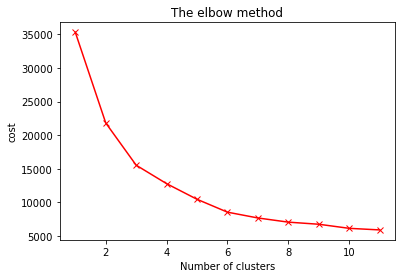

In [23]:
cost=[]

# Finding inertia on various k values
for i in range(1,12):
    kmeans=KMeans(n_clusters = i, init = 'random', 
                    max_iter = 100).fit(data_pca)
    cost.append(kmeans.inertia_)
    
plt.plot(range(1, 12), cost, 'x-', color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('cost') 
plt.show()

In [24]:
score = []
for n in range(2,12):
    kmean = KMeans(n_clusters= n )
    kmean.fit(data_pca)
    result = kmean.labels_
    print(n , '    '  , silhouette_score(data_sc , result))

2      0.3889439982229825
3      0.3960665479871222
4      0.3365388151579015
5      0.35255612639417017
6      0.3683469519083863
7      0.3139192988539553
8      0.3132513712297387
9      0.31425487509569816
10      0.30512973989986414
11      0.2676576296802336


In [25]:
kmeans = KMeans(n_clusters=7,init = 'k-means++', max_iter = 100)

y_kmeans = kmeans.fit_predict(data_pca)

In [26]:
kmeans.n_iter_

6

In [27]:
index=kmeans.labels_

In [28]:
index

array([2, 5, 6, ..., 2, 5, 1])

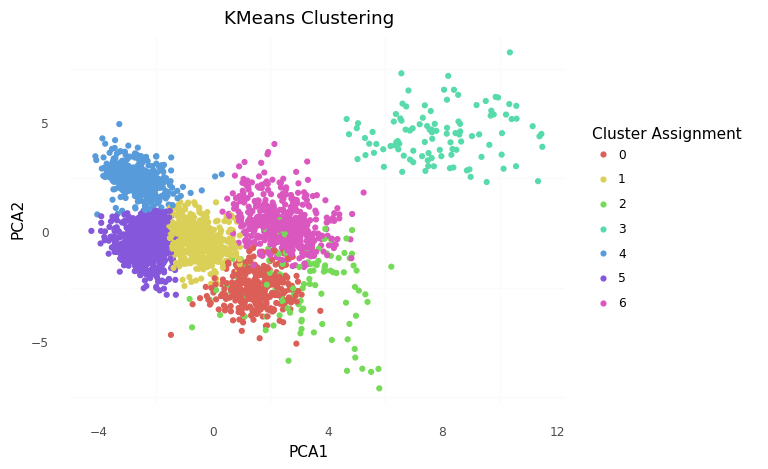

<ggplot: (156278012480)>

In [29]:
data1["k_labels"] = kmeans.labels_
(ggplot(data1, aes(x = "PCA1", y = "PCA2", color = "factor(k_labels)")) +
  geom_point() +
  theme_minimal() +
  scale_color_discrete(name = "Cluster Assignment")+
  theme(panel_grid_major = element_blank()) +
labs(title = "KMeans Clustering"))

In [30]:
print("silhouette_score is equal : ",silhouette_score(data_pca,index))

silhouette_score is equal :  0.3150935236692623


# Hierarchical and plot

In [27]:
data2=data.copy()

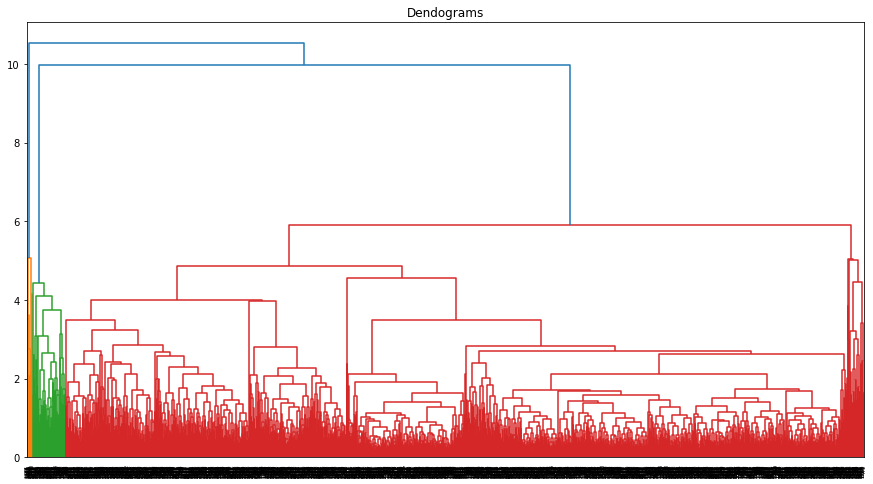

In [28]:
plt.figure(figsize=(15, 8))
plt.title("Dendograms")
dend = sch.dendrogram(sch.linkage(y=data_pca, method='average',metric='euclidean'),orientation='top') 

In [29]:
h1=AgglomerativeClustering(n_clusters=7)

In [30]:
h1.fit(data_pca)

AgglomerativeClustering(n_clusters=7)

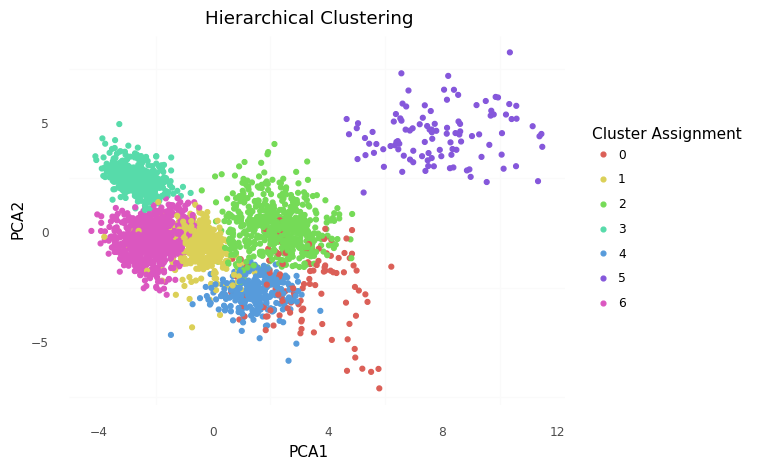

<ggplot: (188730134679)>

In [31]:
data2["h_labels"] = h1.labels_
(ggplot(data2, aes(x = "PCA1", y = "PCA2", color = "factor(h_labels)")) +
  geom_point() +
  theme_minimal() +
  scale_color_discrete(name = "Cluster Assignment")+
  theme(panel_grid_major = element_blank()) +
labs(title = "Hierarchical Clustering"))

In [32]:
print("silhouette_score is equal : ",silhouette_score(data_pca,h1.labels_))

silhouette_score is equal :  0.31407555948637017


# DBscan and plot

In [33]:
data3=data.copy()

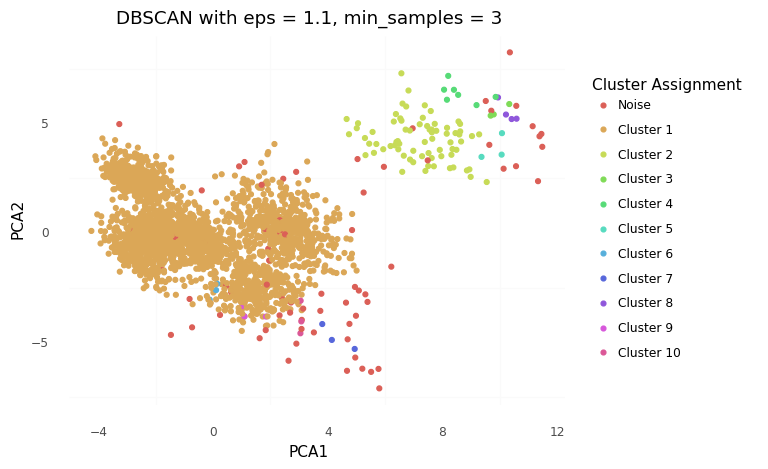

<ggplot: (188734475930)>

In [45]:
db1 = DBSCAN(eps = 1.1, min_samples =3).fit(data_pca)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db1.labels_)))]

data3["assignments"] = db1.labels_

(ggplot(data3, aes(x = 'PCA1', y = 'PCA2', color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 1.1, min_samples = 3"))

In [46]:
print("silhouette_score is equal : ",silhouette_score(data_pca,db1.labels_))

silhouette_score is equal :  0.13656290024864276


# GaussianMixture

In [36]:
data4=data.copy()

In [37]:
GM = GaussianMixture(7)

In [38]:
GM.fit(data_pca)

GaussianMixture(n_components=7)

In [39]:
data4["GM"] = GM.predict(data_pca)

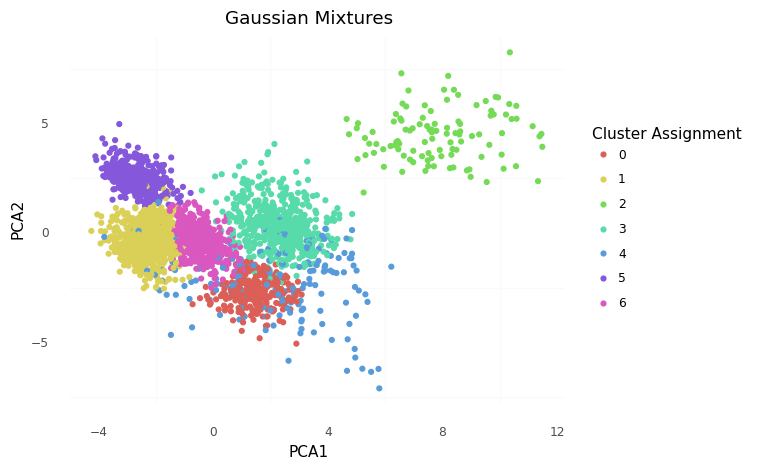

<ggplot: (188734810028)>

In [40]:
(ggplot(data4, aes(x = 'PCA1', y = 'PCA2',color = "factor(GM)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment") +
 theme(panel_grid_major = element_blank()) + 
 labs(title = "Gaussian Mixtures"))

In [41]:
print("silhouette_score is equal : ",silhouette_score(data_pca,data4["GM"]))

silhouette_score is equal :  0.31773118890163243
